#### PCA (Principal Component Analysis) is a linear transformation technique that reduces data dimensionality by projecting it onto new axes called principal components, which capture the maximum variance.

1. **Standardize**: Center the data by subtracting the mean of each feature.
2. **Covariance Matrix**: Calculate the covariance matrix to understand how features vary together.
3.  **Eigen Decomposition**: Compute eigenvalues and eigenvectors of the covariance matrix. Eigenvectors indicate directions (principal components),                               and eigenvalues show the variance in each direction.
4. **Sort and Select**: Rank eigenvalues in descending order. Choose the top components (those with the highest eigenvalues) that capture most of the                         variance.
5. **Transform Data**: Project the data onto these selected components for a lower-dimensional representation.


In [34]:
import pandas as pd 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("Wine.csv")
df.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1


In [36]:
X= df.drop('Customer_Segment', axis=1)  
y= df['Customer_Segment']

In [37]:
for col in X.columns:
    sc = StandardScaler()
    X[col]=sc.fit_transform(X[[col]])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [39]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      0.96      0.98        24
           3       0.94      1.00      0.97        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



In [40]:
pca = PCA() 
X_pca = pca.fit_transform(X)

##### The explained_variance_ratio_ in PCA tells us how much of the total variance in the data is captured by each principal component.
        
In terms of eigenvalues and eigenvectors:

1. Eigenvalues: Each eigenvalue represents the amount of variance captured by its corresponding eigenvector (principal component). Higher eigenvalues mean that the direction (eigenvector) captures more of the data's variance.
2. Explained Variance Ratio: This is calculated by dividing each eigenvalue by the sum of all eigenvalues. It represents the proportion of total variance explained by each principal component.

$$
\text{explained\_variance\_ratio}[i] = \frac{\lambda_i}{\sum_{j=1}^{k} \lambda_j}
$$



In [41]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [46]:
pca.explained_variance_ratio_.cumsum()

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

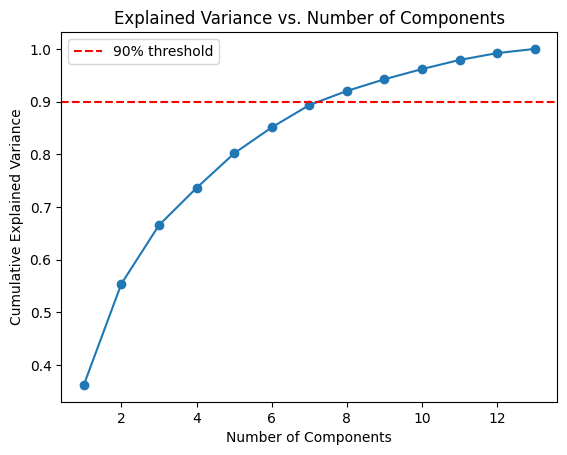

In [45]:

plt.plot(range(1, len(pca.explained_variance_ratio_.cumsum()) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% threshold')
plt.legend()
plt.show()

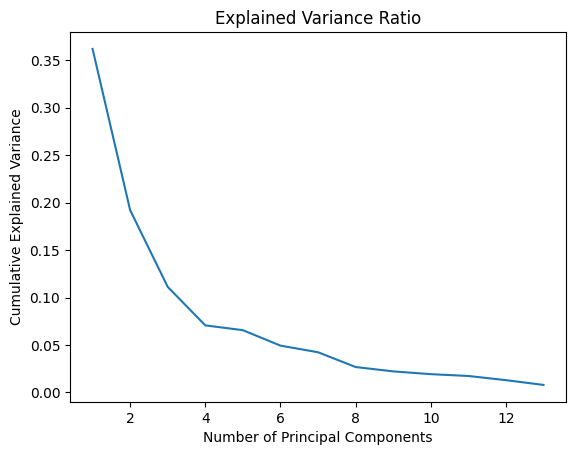

In [27]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Number of Principal Components') 
plt.ylabel('Cumulative Explained Variance') 
plt.title('Explained Variance Ratio') 
plt.show()

In [25]:
X_1, X_2, y_1, y_2 = train_test_split(X_pca, y, test_size=0.33, random_state=42)

In [26]:
classifier = LogisticRegression()
classifier.fit(X_1, y_1)

y_pred = classifier.predict(X_2)
print(classification_report(y_2, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20
           2       1.00      0.96      0.98        24
           3       0.94      1.00      0.97        15

    accuracy                           0.98        59
   macro avg       0.98      0.99      0.98        59
weighted avg       0.98      0.98      0.98        59



In [28]:
n_components = 12  
pca = PCA(n_components=n_components) 
X_pca = pca.fit_transform(X)

In [29]:
X_pca.shape

(178, 12)

In [30]:
X.shape

(178, 13)

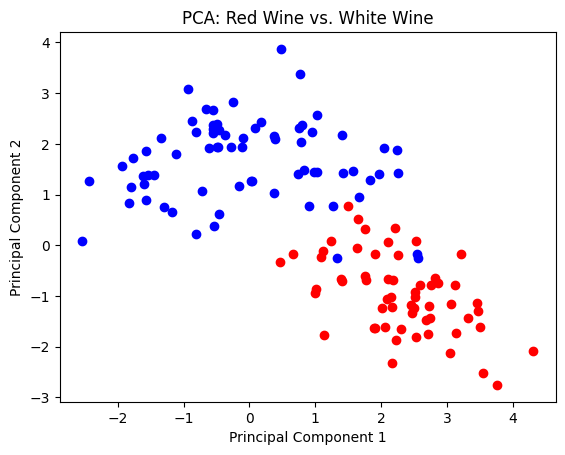

In [31]:
red_indices = y[y == 1].index 
white_indices = y[y == 2].index 
plt.scatter (X_pca[red_indices, 0], X_pca[red_indices, 1], c='red', label='Red')
plt.scatter(X_pca [white_indices, 0], X_pca [white_indices, 1], c='blue', label= plt.xlabel('Principal Component 1')) 
plt.ylabel('Principal Component 2') 
# plt.legend() 

plt.title('PCA: Red Wine vs. White Wine') 
plt.show()